# Econometrics Problem Set 1

### In this problem set we are going to look at the realtionship between violence and unemployment rates across US states. Firstly, I am going to import all of the different libraries that I need.

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Next is to load the data in to a dataframe using pandas and take a look at the data that we have in a tbaular form.

In [8]:
file_path = r"C:\Users\tomdo\Desktop\Stats\econometrics\Econometrics_Problem Set 1\problemset1_data.xls"
df = pd.read_excel(file_path)
df.head()

,State,Unemployment,Violence
0,Alabama,7.2,383.7
1,Alaska,7.0,635.3
2,Arizona,7.7,413.6
3,Arkansas,7.2,503.5
4,California,8.9,439.6


### Now its time to do a bit of data exploration. I start of by looking at the descriptive stats and by visualising it using histograms and scatter plots.

In [9]:
df.describe()

,Unemployment,Violence
count,51.000000,51.000000
mean,6.764706,385.280392
std,1.539328,195.113742
min,2.900000,122.100000
25%,5.550000,260.850000
50%,6.900000,323.700000
75%,7.800000,475.150000
max,9.600000,1326.800000


In [10]:
df[df["Violence"] == df["Violence"].max()]

,State,Unemployment,Violence
8,District of Columbia,8.5,1326.8


In [11]:
df[df["Violence"] == df["Violence"].min()]

,State,Unemployment,Violence
19,Maine,6.6,122.1


In [12]:
df[df["Unemployment"] == df["Unemployment"].max()]

,State,Unemployment,Violence
28,Nevada,9.6,663.0


In [13]:
df[df["Unemployment"] == df["Unemployment"].min()]

,State,Unemployment,Violence
34,North Dakota,2.9,229.5


**Lest pause here for a second. We've got some descriptive stats for the data but what are they actually telling us. Well it looks like there is some relationship between violence and unemployment as the District of Colombia has the highest rate of violence and is in the highest quartile of unemployment too. Similarly Nevade which has the highest rate of unemmployment is also in the highest quartile of violence but is still quite far behind Colombia.**

**Maine which has the lowest violence rate has a below average level of unemployment. North Dakota which has the lowest unemployment rate also has a low violence rate, in the bottom quartile.**

**However, its still quite hard to get a full flavour of whats going on so lets visualise the data using matplotlib.**

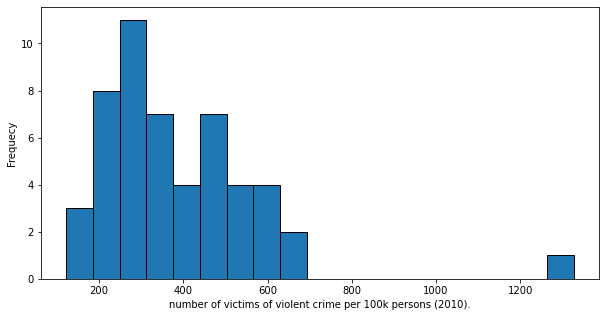

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df["Violence"], bins=19, edgecolor="black")

plt.xlabel("number of victims of violent crime per 100k persons (2010).")
plt.ylabel("Frequecy")

plt.show()

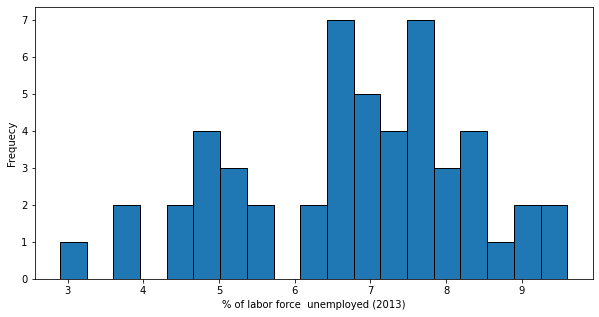

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df["Unemployment"], bins=19, edgecolor="black")

plt.xlabel("% of labor force  unemployed (2013)")
plt.ylabel("Frequecy")

plt.show()

Text(0, 0.5, 'Violence')

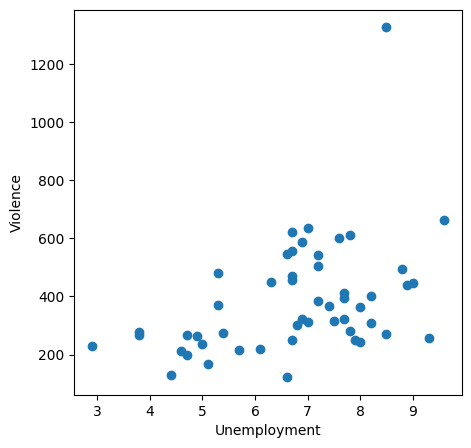

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(df["Unemployment"], df["Violence"])
plt.xlabel("Unemployment")
plt.ylabel("Violence")

In [64]:
c, p = scipy.stats.pearsonr(df["Violence"], df["Unemployment"])
print(f"The correlation coefficient between Violence and Unemployment is {c}. \nThe p value is {p}")

The correlation coefficient between Violence and Unemployment is 0.4208817510627495. 
The p value is 0.002102099087772618


**It is clear from these charts that there is some positive correlation between violence and unemployment across the different states in the US and that the rate of violence in the District of Columbia is significantly higher than anywhere else.**

**Now lets try and estimate the effect of unemployment on the rate of violence**

In [65]:
x, y = df["Unemployment"], df["Violence"]

In [66]:
x = sm.add_constant(x)

C:\Users\tomdo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
model = sm.OLS(y, x)

In [68]:
results = model.fit()

In [69]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Violence   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Wed, 27 Sep 2023   Prob (F-statistic):            0.00210
Time:                        18:49:01   Log-Likelihood:                -335.84
No. Observations:                  51   AIC:                             675.7
Df Residuals:                      49   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.3979    113.900      0.214   

**The results from this show that for a 1% increase in unemployment, on average there would tend to be 53 more cases of violence per 100k people.**

**If the rate of unemployment was to increase by 1 standard deviation (1.5%) this would result in an increase in the cases of violence per 100k people by 1.5 * 53 = 82. The standard deviation in violence is 195 so the 1 sd move in unemployment would cause a 0.42 sd move in violence.**
